In [45]:
#Making a small subset for matching one coarser grids data to a fined grid
import xugrid as xu
import dfm_tools as dfmt
import pandas as pd
import numpy as np
from itertools import compress

#for plotting
import matplotlib.pyplot as plt
import contextily as ctx

In [76]:
#Start with visualising both grids of DCSM

## Bounding box for small example coarse grid(based on WGS84 - EPSG:4326)
x_coarsebox = [4.95,5.01]
y_coarsebox = [53.15,53.23]

## Bounding box for small example fine grid(based on WGS84 - EPSG:4326)
x_finebox = [4.96,5.0]
y_finebox = [53.17,53.22]

In [82]:
## Load the course grid of DCSM (this contains the light attenuation variables required)
ds_in1 = r'p:\archivedprojects\11209731-002-nutrient-reduction-ta\runs_OSPAR\B05_waq_withDOM_2017\DFM_OUTPUT_DCSM-FM_0_5nm_waq\DCSM-FM_0_5nm_waq_*_map.nc'
uds1 = dfmt.open_partitioned_dataset(ds_in1)
print(uds1)
print("time span: "+ str(uds1.time[0].values) + " - " + str(uds1.time[-1].values) + " , timesteps : " + str(len(uds1.time)))




>> xu.open_dataset() with 256 partition(s): 1 2 3 4 5 

KeyboardInterrupt: 

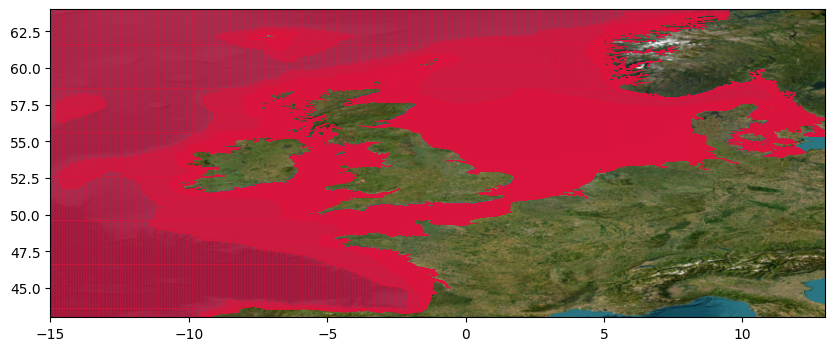

In [5]:
## plot the course grid of DSCM. Use a random variable and plot line to get the grid.
crs = 'EPSG:4326'
line_array = None
fig, ax = plt.subplots(figsize=(10,4))
pc = uds.grid.plot(edgecolor='crimson', linewidth=0.5)
if crs is None:
    ax.set_aspect('equal')
else:
    ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs=crs, attribution=False)
if line_array is not None:
    ax.plot(line_array[:,0],line_array[:,1],'b',linewidth=3)

In [25]:
## load the fine grid (100m) of the DCSM WaddenSea model (including velocity, salinity, temperature, waterdepth, waves and silt)
ds_in2 = r'p:\11209182-edito-internship\HabitatSuitability\Data\Eelgrass_data\DWSM-FM_100m_*_map.nc'
uds2 = dfmt.open_partitioned_dataset(ds_in2)
print(uds2)
print("time span: "+ str(uds2.time[0].values) + " - " + str(uds2.time[-1].values) + " , timesteps : " + str(len(uds2.time)))

<xarray.Dataset> Size: 127GB
Dimensions:                         (time: 366, mesh2d_nInterfaces: 11,
                                     mesh2d_nLayers: 10, mesh2d_nNodes: 199060,
                                     mesh2d_nFaces: 198536,
                                     mesh2d_nMax_face_nodes: 4,
                                     mesh2d_nEdges: 397587)
Coordinates:
  * time                            (time) datetime64[ns] 3kB 2017-01-01 ... ...
    mesh2d_node_x                   (mesh2d_nNodes) float64 2MB dask.array<chunksize=(10084,), meta=np.ndarray>
    mesh2d_node_y                   (mesh2d_nNodes) float64 2MB dask.array<chunksize=(10084,), meta=np.ndarray>
    mesh2d_face_x                   (mesh2d_nFaces) float64 2MB dask.array<chunksize=(9926,), meta=np.ndarray>
    mesh2d_face_y                   (mesh2d_nFaces) float64 2MB dask.array<chunksize=(9926,), meta=np.ndarray>
    mesh2d_edge_x                   (mesh2d_nEdges) float64 3MB dask.array<chunksize=(20006,), 

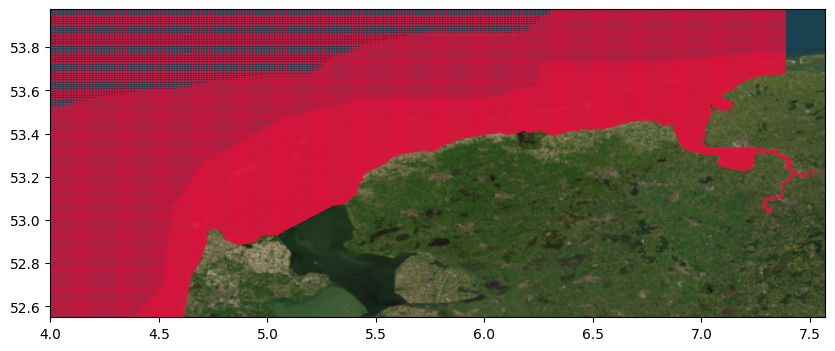

In [7]:
## plot the ne grid of DSCM WaddenSea. Use a random variable and plot line to get the grid.
crs = 'EPSG:4326'
line_array = None
fig, ax = plt.subplots(figsize=(10,4))
pc = uds2.grid.plot(edgecolor='crimson', linewidth=0.5)
if crs is None:
    ax.set_aspect('equal')
else:
    ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs=crs, attribution=False)
if line_array is not None:
    ax.plot(line_array[:,0],line_array[:,1],'b',linewidth=3)

In [8]:
#Additional steps needed:
## time interpolation : Course grid has 71 time steps (check if indeed 2017 covered) fine grid 366 time steps for 2017 
## Link https://docs.xarray.dev/en/stable/user-guide/interpolation.html

## matching course grid data to fine grid data:
## use centroid of fine cells and see in which coarse cell they land, map data based on this coupling to fine grid and write to file (?with explanatory variable name instead of waq_process_output_87?)
## Link : check xugrid for centre points, mapping based on pandas to xarray (see earlier work)

## Workable small example for GitHub example. Use example file making (small slice for area of interest) to subset a workable example
## use this for testing.
## then subset from course grid only cells within range of Waddensea model (saves computing / matching time)

In [77]:
## Subset coarse grid by bounding box
sub_file1 = uds.ugrid.sel(x=slice(x_coarsebox[0], x_coarsebox[1]), y=slice(y_coarsebox[0], y_coarsebox[1]))

#print(sub_file1)
## Subset coarse grid on time
sub_file1 = sub_file1.sel(time = slice('2017-06-01','2017-07-01'))

#Check
print(sub_file1)

<xarray.Dataset> Size: 16MB
Dimensions:                         (time: 6, mesh2d_nInterfaces: 51,
                                     mesh2d_nLayers: 50, mesh2d_nNodes: 66,
                                     mesh2d_nFaces: 50,
                                     mesh2d_nMax_face_nodes: 4,
                                     mesh2d_nEdges: 115)
Coordinates:
    mesh2d_layer_sigma_z            (mesh2d_nLayers) float64 400B -5.131e+03 ...
  * time                            (time) datetime64[ns] 48B 2017-06-05 ... ...
    mesh2d_node_x                   (mesh2d_nNodes) float64 528B dask.array<chunksize=(66,), meta=np.ndarray>
    mesh2d_node_y                   (mesh2d_nNodes) float64 528B dask.array<chunksize=(66,), meta=np.ndarray>
    mesh2d_face_x                   (mesh2d_nFaces) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    mesh2d_face_y                   (mesh2d_nFaces) float64 400B dask.array<chunksize=(50,), meta=np.ndarray>
    mesh2d_edge_x                 

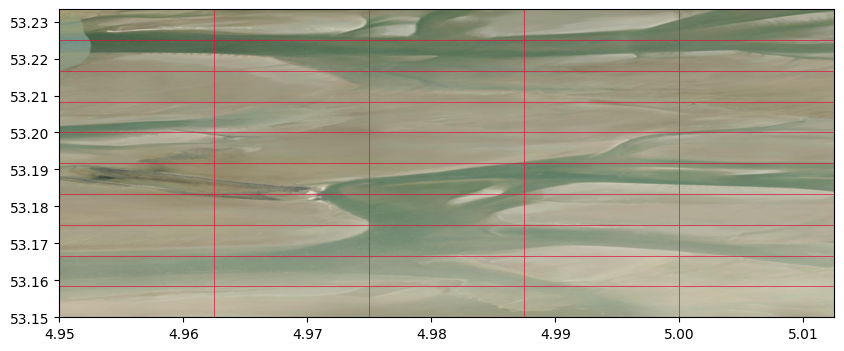

In [78]:
## plot the sub file of the course grid of DSCM. Use a random variable and plot line to get the grid.
crs = 'EPSG:4326'
line_array = None
fig, ax = plt.subplots(figsize=(10,4))
pc = sub_file1.grid.plot(edgecolor='crimson', linewidth=0.5)
if crs is None:
    ax.set_aspect('equal')
else:
    ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs=crs, attribution=False)
if line_array is not None:
    ax.plot(line_array[:,0],line_array[:,1],'b',linewidth=3)

In [69]:
## Subset fine grid by bounding box
sub_file2 = uds2.ugrid.sel(x=slice(x_finebox[0], x_finebox[1]), y=slice(y_finebox[0], y_finebox[1]))

## Subset fine grid on time
sub_file2 = sub_file2.sel(time = slice('2017-06-01','2017-07-01'))

#Check
print(sub_file2)

<xarray.Dataset> Size: 17MB
Dimensions:                         (time: 31, mesh2d_nInterfaces: 11,
                                     mesh2d_nLayers: 10, mesh2d_nNodes: 350,
                                     mesh2d_nFaces: 312,
                                     mesh2d_nMax_face_nodes: 4,
                                     mesh2d_nEdges: 661)
Coordinates:
  * time                            (time) datetime64[ns] 248B 2017-06-01 ......
    mesh2d_node_x                   (mesh2d_nNodes) float64 3kB dask.array<chunksize=(20,), meta=np.ndarray>
    mesh2d_node_y                   (mesh2d_nNodes) float64 3kB dask.array<chunksize=(20,), meta=np.ndarray>
    mesh2d_face_x                   (mesh2d_nFaces) float64 2kB dask.array<chunksize=(9,), meta=np.ndarray>
    mesh2d_face_y                   (mesh2d_nFaces) float64 2kB dask.array<chunksize=(9,), meta=np.ndarray>
    mesh2d_edge_x                   (mesh2d_nEdges) float64 5kB dask.array<chunksize=(28,), meta=np.ndarray>
    mesh2

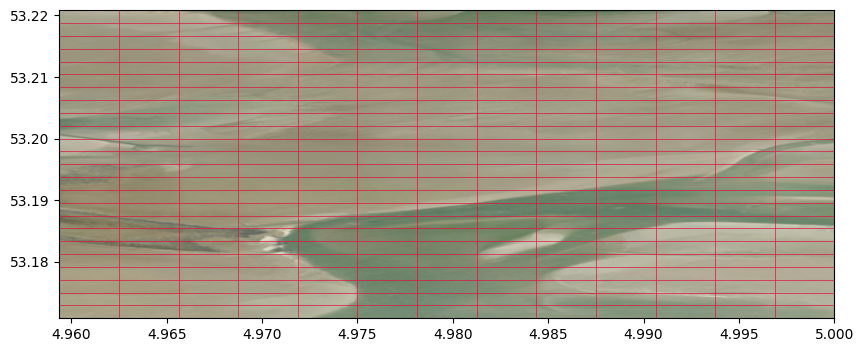

In [64]:
## plot the sub file grid of DSCM WaddenSea. Use a random variable and plot line to get the grid.
crs = 'EPSG:4326'
line_array = None
fig, ax = plt.subplots(figsize=(10,4))
pc = sub_file2.grid.plot(edgecolor='crimson', linewidth=0.5)
if crs is None:
    ax.set_aspect('equal')
else:
    ctx.add_basemap(ax=ax, source=ctx.providers.Esri.WorldImagery, crs=crs, attribution=False)
if line_array is not None:
    ax.plot(line_array[:,0],line_array[:,1],'b',linewidth=3)

In [79]:
# export both subfiles for an example
sub_file1.ugrid.to_netcdf("c:/_checkouts/decoimpact_examples/tests/testdata/ugrid_netcdf/delft3dfmflow_output_example_DCSM-FM_0_5nm_waq_map.nc")
sub_file2.ugrid.to_netcdf("c:/_checkouts/decoimpact_examples/tests/testdata/ugrid_netcdf/delft3dfmflow_output_example_DWSM-FM_100m_map.nc")